In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [2]:
# This is how Lawrence Berkeley Labs breaks up the US in their annual Wind Technology Report:
lbl_regions= {'interior':['MT','WY','ND','SD','CO','NM','MN','IA','NE','KS','OK','TX','MO'],
              'west':['CA','OR','WA','ID','NV','UT','AZ'],
              'great_lakes':['WI','MI','IL','IN','OH'],
              'northeast':['NJ','PA','NY','CT','RI','MA','VT','NH','ME'],
              'southeast':['LA','AR','MS','AL','GA','FL','SC','NC','TN','KY','WV','VA','MD','DE']
             }
# These are the most recent regional average wind PPA costs from the 2015 LBL Wind Technology Report.
# They are in $/MWh.  The Southeast region does not have sufficient data.
lbl_wind_ppa_costs={'interior'    : 17.54,
                    'west'        : 60.90,
                    'great_lakes' : 38.30,
                    'northeast'   : 62.17,
                    'southeast'   : np.nan
                   }
# Where's my data?
datadir = '../mcoe_vs_wind_ppas'
coal = ['Conventional Steam Coal','Coal Integrated Gasification Combined Cycle']
ccgt = ['Natural Gas Fired Combined Cycle',]
ngct = ['Natural Gas Fired Combustion Turbine',]
ncst = ['Natural Gas Steam Turbine',]
# This file came from Christina Gosnell, based on work done by Andy Goggins.
# The data within it comes mostly from EIA form 923.
mcoe=pd.read_excel('{}/MCOE_by_MWh.xlsx'.format(datadir))
# MWh are too small.  Let's use TWh
mcoe['net_gen_TWh']=mcoe['net_gen_mwh']/1000000

In [3]:
def mcoe_hist(df,techs=None,
              region=None,
              regions=None,
              ppa_costs=None,
              bins=np.arange(0,100,1),
              fuel_color='black',
              wind_color='green',
              title=None):
    if techs is not None:
        df = df[df.tech.isin(techs)]
    if region is not None:
        df = df[df.state.isin(regions[region])]
    
    mcoe_ax=df.mcoe_usd_mwh.hist(bins=bins,
                                 weights=df.net_gen_TWh,
                                 figsize=(12,8),
                                 color=fuel_color)
    mcoe_ax.set_xlabel("USD/MWh")
    mcoe_ax.set_ylabel("Net TWh Generated")
    mcoe_ax.set_ylim(0,None)
    if title is not None:
        mcoe_ax.set_title(title)
    if ppa_costs is not None:
        mcoe_ax.axvline(ppa_costs[region],
                        label='Wind PPA cost in {} region'.format(region),
                        color=wind_color)
        mcoe_ax.legend()

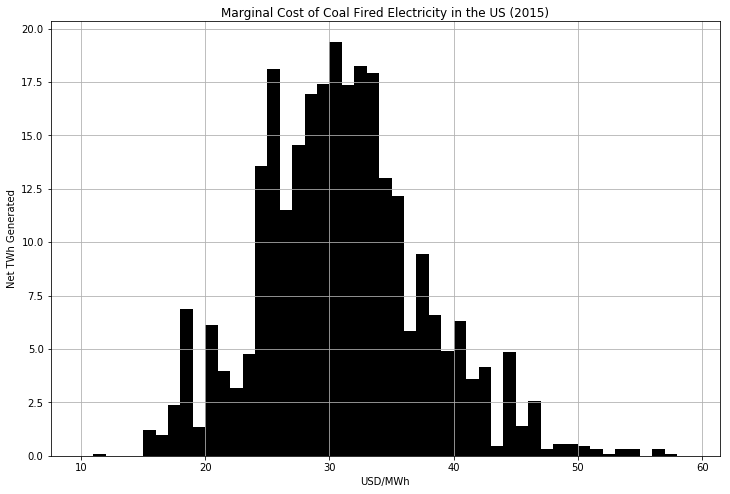

In [4]:
mcoe_hist(mcoe,
          techs=coal,
          regions=lbl_regions,
          region=None,
          bins=np.arange(10,60,1),
          title='Marginal Cost of Coal Fired Electricity in the US (2015)',
          ppa_costs=None)

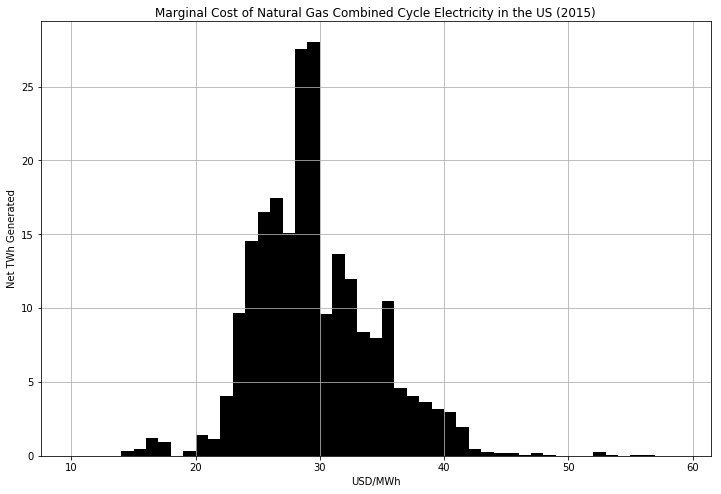

In [5]:
mcoe_hist(mcoe,
          techs=ccgt,
          regions=lbl_regions,
          region=None,
          bins=np.arange(10,60,1),
          title='Marginal Cost of Natural Gas Combined Cycle Electricity in the US (2015)',
          ppa_costs=None)

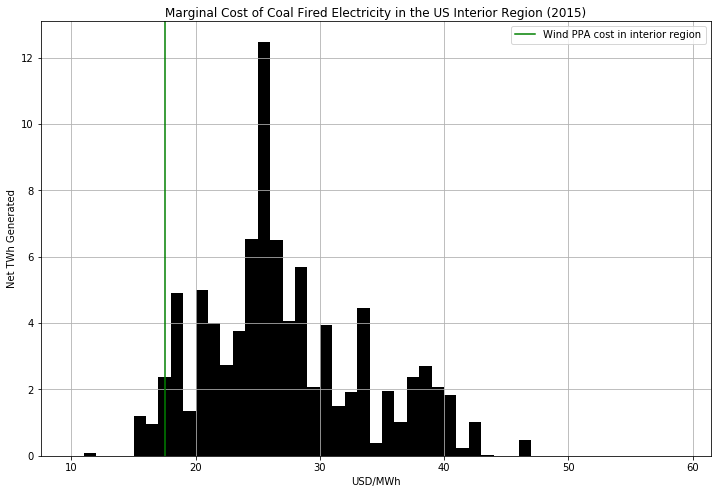

In [6]:
mcoe_hist(mcoe,
          techs=coal,
          regions=lbl_regions,
          region='interior',
          bins=np.arange(10,60,1),
          title='Marginal Cost of Coal Fired Electricity in the US Interior Region (2015)',
          ppa_costs=lbl_wind_ppa_costs)

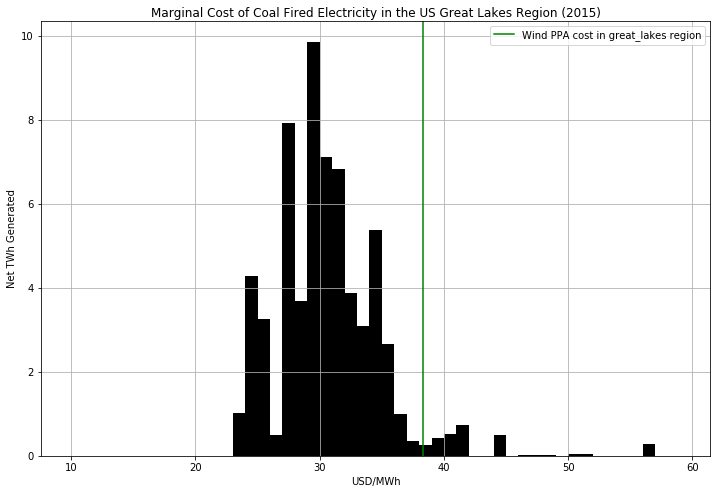

In [7]:
mcoe_hist(mcoe,
          techs=coal,
          regions=lbl_regions,
          region='great_lakes',
          bins=np.arange(10,60,1),
          title='Marginal Cost of Coal Fired Electricity in the US Great Lakes Region (2015)',
          ppa_costs=lbl_wind_ppa_costs)

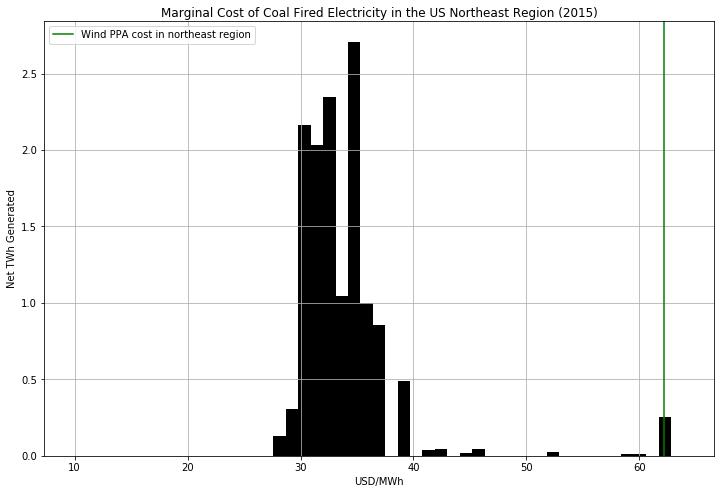

In [8]:
mcoe_hist(mcoe,
          techs=coal,
          regions=lbl_regions,
          region='northeast',
          bins=np.arange(10,65,1.1),
          title='Marginal Cost of Coal Fired Electricity in the US Northeast Region (2015)',
          ppa_costs=lbl_wind_ppa_costs)

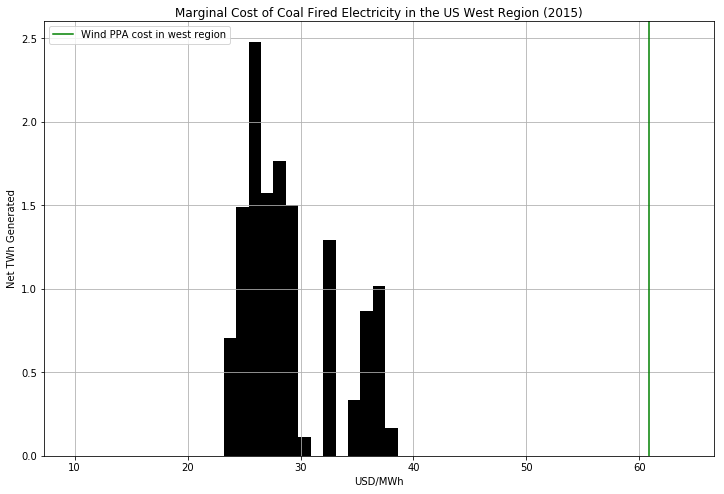

In [9]:
mcoe_hist(mcoe,
          techs=coal,
          regions=lbl_regions,
          region='west',
          bins=np.arange(10,65,1.1),
          title='Marginal Cost of Coal Fired Electricity in the US West Region (2015)',
          ppa_costs=lbl_wind_ppa_costs)

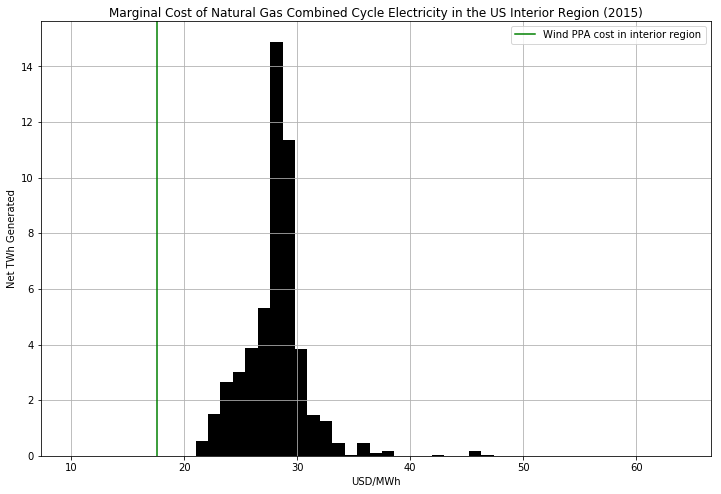

In [10]:
mcoe_hist(mcoe,
          techs=ccgt,
          regions=lbl_regions,
          region='interior',
          bins=np.arange(10,65,1.1),
          title='Marginal Cost of Natural Gas Combined Cycle Electricity in the US Interior Region (2015)',
          ppa_costs=lbl_wind_ppa_costs)